In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
data = pd.read_csv("Data.csv")

# K Means

In [ ]:
data.head()

,f1,f2,f3,f4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# repeat
# 1. Initilize centroids
# 2. compute distances
# 3. Assign to each cluster its data point
# 4. update the centrioid

In [ ]:
# 1. Initilize centroids
def initlialize_centriods(data, k):
  # data size
  n = data.shape[0]
  # Pick random indices
  inds = np.random.choice(n, size=k, replace=False)
  # pick the centriods
  centriods = data.iloc[inds, :]
  return centriods

In [ ]:
k = 3
centriods = initlialize_centriods(data, k)
centriods

,f1,f2,f3,f4
118,7.7,2.6,6.9,2.3
136,6.3,3.4,5.6,2.4
46,5.1,3.8,1.6,0.2


In [ ]:
# 2. compute distances
from collections import defaultdict
def compute_distnce(data, centriods):
  K = centriods.shape[0]
  dis_df = pd.DataFrame(columns= [f"c{i}" for i in range(1, K+1)])
  # print( centriods)
  for k in range(K):
    dis_df[f"c{k+1}"] = ((data - centriods.iloc[k, :])**2).sum(axis=1)
  return dis_df

In [ ]:
dis_df = compute_distnce(data, centriods)


In [ ]:
argmin = dis_df.to_numpy().argmin(axis=1)
argmin

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
dis_df.head()

,c1,c2,c3
0,42.23,23.93,0.13
1,42.66,24.60,0.72
2,45.13,25.93,0.61
3,43.43,24.63,0.75
4,42.95,24.21,0.09


In [ ]:
def assign_clusters(data, dis_df, centriods):
  K = centriods.shape[0]
  columns= [f"c{i}" for i in range(1, K+1)]
  d = {i: v for i, v in zip(range(K), columns)}
  argmin = dis_df.to_numpy().argmin(axis=1)
  clusters = {k:[] for k in columns}
  for i, dis in enumerate(dis_df.to_numpy()):
    min_ind = dis.argmin()
    point = data.iloc[i]
    cluster = d[min_ind]
    clusters[cluster].append(point.to_numpy())
  # print(clusters)
  return clusters

In [ ]:
clu = assign_clusters(data, dis_df, centriods)

In [ ]:
# 4. update the centrioid
def update_cnetriod(clusters, k, n):
  d = {}
  for i, cluster in enumerate(clusters):
    d[f"c{i+1}"] = np.mean(clusters[cluster], axis=0)
  # print(f"d={d}")
  df = pd.DataFrame(d, columns=None).T
  df.columns = [f"f{i+1}" for i in range(n)]
  df.index = [i for i in range(k)]
  return df

In [ ]:
def K_means(data, iterations=1000, k=3, show_progress=False):
  centriods = initlialize_centriods(data, k)
  n = data.shape[1]
  for i in range(iterations):
    dis_df = compute_distnce(data.copy(), centriods)
    # print(f"dis: {dis_df}")
    clusters = assign_clusters(data, dis_df, centriods)
    centriods = update_cnetriod(clusters, k, n)
    if show_progress:
      print(f"Iteration: {i+1}")
      print(centriods.to_numpy())
  return centriods, clusters

In [ ]:
final_centriods, _ = K_means(data, 300, 2, False)

In [ ]:
final_centriods

,f1,f2,f3,f4
0,5.005660,3.369811,1.560377,0.290566
1,6.301031,2.886598,4.958763,1.695876


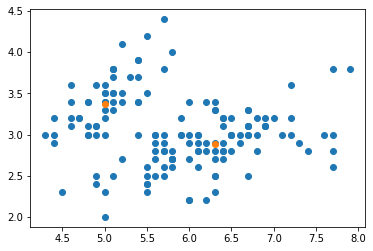

In [ ]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1])
plt.scatter(final_centriods.iloc[:, 0], final_centriods.iloc[:, 1])

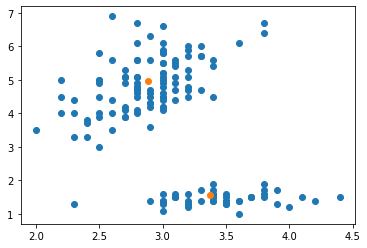

In [ ]:
plt.scatter(data.iloc[:, 1], data.iloc[:, 2])
plt.scatter(final_centriods.iloc[:, 1], final_centriods.iloc[:, 2])

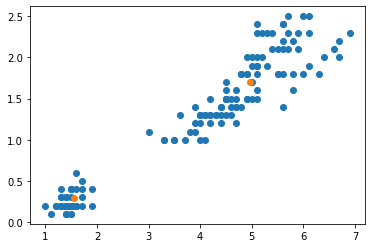

In [ ]:
plt.scatter(data.iloc[:, 2], data.iloc[:, 3])
plt.scatter(final_centriods.iloc[:, 2], final_centriods.iloc[:, 3])

# PCA

In [ ]:
data = pd.read_csv("Data.csv")

In [ ]:
# PCA
# 1. Standarize your data
# 2. Compute the covariance matrix
# 3. Perform eigen decemposition to extract the k principle components 

In [ ]:
# 1. Standarize your data
def standardize_data(data):
  return (data - data.mean()) / data.std()

In [ ]:
# 2. Compute the covariance matrix
def cov_matrix(data):
  return data.to_numpy().T @ data.to_numpy()

In [ ]:
# 3. Perform eigen decemposition to extract the k principle components 
def eig_decomp(m):
  e, v = np.linalg.eig(m)
  return e, v

In [ ]:
def PCA(data, rank):
  data_stand = standardize_data(data)
  cov = cov_matrix(data_stand)
  e, v = eig_decomp(cov)
  P = v[:, :rank]
  return P

In [ ]:
P = PCA(data, 2)

In [ ]:
# Using the first two principal components, we will plot the projected data and the centriods from the previous section
data_proj = data.to_numpy() @ P
centriods_proj = final_centriods.to_numpy() @ P

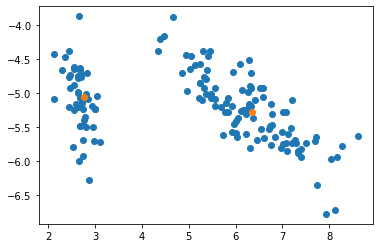

In [ ]:
plt.scatter(data_proj[:, 0], data_proj[:, 1])
plt.scatter(centriods_proj[:, 0], centriods_proj[:, 1])

In [ ]:
P = PCA(data, 3)

In [ ]:
# Now we will the first three principal components, and plot the projected data and the centriods from the previous section
data_proj_3d = data.to_numpy() @ P
centriods_proj_3d = final_centriods.to_numpy() @ P

In [ ]:
centriods_proj_3d

array([[ 2.77042052, -5.05822379, -2.37231541],
       [ 6.3418124 , -5.27827683, -2.04815884]])

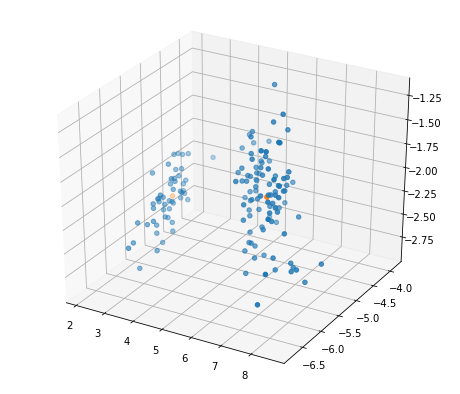

In [ ]:
fig = plt.figure(figsize = (8, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(data_proj_3d[:, 0], data_proj_3d[:, 1], data_proj_3d[:, 2])
ax.scatter3D(centriods_proj_3d[:, 0], centriods_proj_3d[:, 1], centriods_proj_3d[:, 2])

# Extra Expermentation


In [ ]:
# Compute the dissimilarity of a cluster with respect to the l2 distance
def variability(cluster):
  mean = np.mean(cluster) # mean/centriod of the cluster
  diss = ((np.array(cluster) - mean)**2).sum()
  return diss

def dissimilarity(clusters_var):
  return np.sum(clusters_var)

In [ ]:
def K_means(data, iterations=1000, k=3, show_progress=False):
  centriods = initlialize_centriods(data, k)
  n = data.shape[1]
  for i in range(iterations):
    dis_df = compute_distnce(data.copy(), centriods)
    # print(f"dis: {dis_df}")
    clusters = assign_clusters(data, dis_df, centriods)
    centriods = update_cnetriod(clusters, k, n)
    if show_progress:
      var = []
      for c in clusters:
        var.append(variability(clusters[c]))
      diss = dissimilarity(var)
      print(f"Iteration: {i+1}, diss={diss}")
      # print(centriods.to_numpy())
  return centriods, clusters

In [ ]:
# search for the best K that minimizes the dissimilarity
K = np.arange(1, 2)
k_dis = []
_, clusters = K_means(data, 300, 5, False)